# Estimating the effective connectivity in your dataset

### Using whole-brain Reservoir Computing Causality

In [3]:
from methods.effective_connectivity import RCC

# Use a json file for config
args = "./args.json"

# Create a dict for config
""" args = {
    "dir": "./Datasets/Logistic",
    "r_folder": "Results_test",
    "num_jobs": 1,
    "blocks": "vanilla",
    "num_blocks": None,
    "split": 80,
    "skip": 5,
    "length": 100,
    "subjects": ["sub-11_logistic_TS", "sub-12_logistic_TS"],
    "rois": [-1],
    "num_surrogates": 100,
    "min_lag": -20,
    "max_lag": 21,
    "runs": 20,
    "logistic": True
} """

# Create instance of RCC
ReservoirComputingCausality = RCC(args=args)

In [4]:
# Access attributes to see what the method will be run upon
print("Files/subjects to process: ", ReservoirComputingCausality.files)
print("Directory were the results will appear: ", ReservoirComputingCausality.output_dir)
print("Reservoir(s) configuration: \n", ReservoirComputingCausality.I2N, "\n", ReservoirComputingCausality.N2N)
print("You can customize on the fly the ROIs to study by modifying the 'ReservoirComputingCausality.ROIs' property!")
print("etc.")

Files/subjects to process:  ['./Datasets/Logistic/sub-11_logistic_TS.txt', './Datasets/Logistic/sub-12_logistic_TS.txt']
Directory were the results will appear:  /home/joanfr/Documents/Git-Repos/Effective-Connectivity-Reservoir-Computing/Results_test
Reservoir(s) configuration: 
 InputToNode(bias_scaling=1, bias_shift=0, hidden_layer_size=50,
            input_activation='logistic', input_scaling=1, input_shift=0, k_in=1,
            random_state=None) 
 NodeToNode(hidden_layer_size=50, leakage=1, random_state=None, sparsity=1,
           spectral_radius=1)
You can customize on the fly the ROIs to study by modifying the 'ReservoirComputingCausality.ROIs' property!
etc.


In [5]:
# Fit a single subject
f = ReservoirComputingCausality.files[0]
name_f = ReservoirComputingCausality.fit_subject(f, run_self_loops=False, factor=10, verbose=True)

Participant ID: sub-11_logistic_Length-100_Method-RCC
Loading data
Done!
-----
Computing reservoir scores and evidence
Training reservoirs for ROIs [0,1]
Done!
-----
Training surrogate reservoirs for ROIs [0,1]


  0%|          | 0/100 [00:00<?, ?it/s]

 15%|█▌        | 15/100 [00:53<05:05,  3.59s/it]

 27%|██▋       | 27/100 [01:37<04:25,  3.63s/it]

 32%|███▏      | 32/100 [01:55<04:06,  3.62s/it]

 53%|█████▎    | 53/100 [03:11<02:49,  3.60s/it]

 60%|██████    | 60/100 [03:36<02:22,  3.56s/it]

100%|██████████| 100/100 [06:02<00:00,  3.62s/it]

Done!
-----
Estimating the directionality for ROIs [0,1]
Done!
-----
Saving the summary for ROIs [0,1]
Done!
-----
Subject finished!
-------------------------------


In [ ]:
# Or fit the whole dataset
ReservoirComputingCausality.fit_dataset(run_self_loops=False, factor=10)

### Using Bivariate Granger causality

In [1]:
from methods.effective_connectivity import bivariate_GC

# Use a json file for config
# args = "./args.json"

# Create a dict for config
args = {
    "dir": "./Datasets/Logistic",
    "r_folder": "Results_test_bivGC",
    "num_jobs": 1,
    "length": 100,
    "subjects": ["sub-11_logistic_TS", "sub-12_logistic_TS"],
    "rois": [-1],
    "min_lag": -20,
    "logistic": True
}

# Create instance of Bivariate GC
BivariateGrangerCausality = bivariate_GC(args=args)

In [2]:
# Fit a single subject
f = BivariateGrangerCausality.files[0]
name_f = BivariateGrangerCausality.fit_subject(f, run_self_loops=False, make_stationary=False, verbose=True)

Participant ID: sub-11_logistic_Length-100_Method-bivGC
Loading data
Done!
-----
Computing bivariate Granger influence
Estimating the directionality for ROIs [0,1]
Done!
-----
Saving the summary for ROIs [0,1]
Done!
-----
Subject finished!
-------------------------------


/home/joanfr/miniconda3/envs/RCC/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [3]:
# Or fit the whole dataset
BivariateGrangerCausality.fit_dataset(run_self_loops=False, make_stationary=False)

============= Sequential processing =================
INFO: 	 Parallel or sequential processing depends on the input arguments --num_jobs
Participant ID: sub-11_logistic_Length-100_Method-bivGC
Subject finished!
-------------------------------
Participant ID: sub-12_logistic_Length-100_Method-bivGC
Subject finished!
-------------------------------


# Retrospective analyses of the estimation process

In [1]:
from analysis.effective_connectivity import Subject_Effective_Connectivity
import matplotlib.pyplot as plt
#dir = "Results_test/"
dir = "Results_test_bivGC/"
name_subject = 'sub-11_logistic_Length-100_Method-bivGC'
ROI_Labels = {1: "Node 1", 2: "Node 2"}
ob = Subject_Effective_Connectivity(dir, name_subject, ROI_Labels=ROI_Labels)

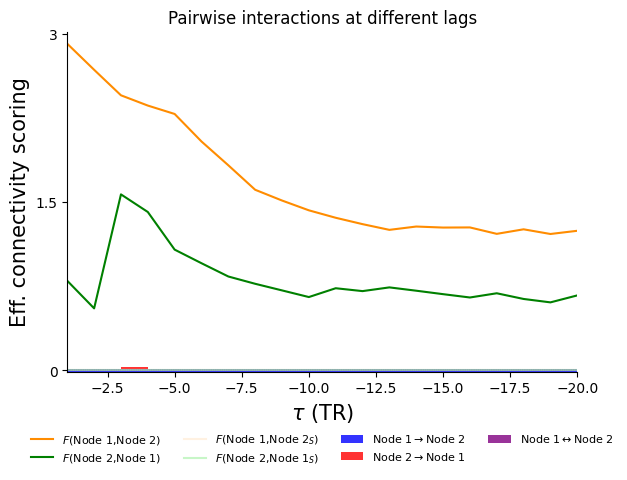

In [4]:
roi_i, roi_j = 1,2
x_label = r"$\tau$ (TR)"
score_label = r"$F$"
title = "Pairwise interactions at different lags"
ob.plot_interaction_ij(roi_i, roi_j, x_label=x_label, title=title, score_label=score_label, ylims=(0,3))

In [4]:
Gs, As = ob.Lagged_Networks(weighted=True)
import networkx as nx
nx.get_edge_attributes(Gs[-20], 'weight')

{(1, 2): 0.9991834418086821, (2, 1): 0.4779234359059429}

In [5]:
As[-20]

array([[0.        , 0.99918344],
       [0.47792344, 0.        ]])

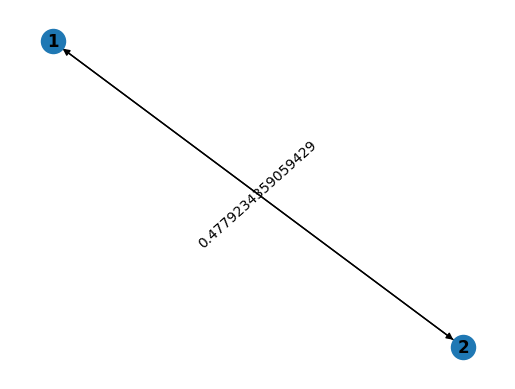

In [6]:
import networkx as nx
pos = nx.spring_layout(Gs[-20])
labels = nx.get_edge_attributes(Gs[-20],'weight')
nx.draw_networkx_edge_labels(Gs[-20], pos, edge_labels=labels)

# Make the graph
nx.draw(Gs[-20], with_labels=True, font_weight="bold", arrows=True)
